# __Crimes in London__

Import libraries yang diperlukan

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
mpl.style.use(['ggplot'])

## Dataset
Keterangan kolom dalam dataset:
- lsoa_code: kode area polisi
- borough: nama wilayah London yang berkaitan dalam statistik
- major_category: kategori kejahatan utama
- minor_category: kategori kejahatan ringan
- value: jumlah kasus kejahatan pada bagian wilayah dan bulan tertentu
- year: tahun ringkasan kasus dilaporkan
- bulan: bulan ringkasan kasus dilaporkan

Baca data

In [2]:
# buka dataset
df_lon = pd.read_csv("london_crime.csv")
# menampilkan 10 baris data teratas
df_lon.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


## Data Preprocessing

Memeriksa dimensi data

In [3]:
df_lon.shape

(13490604, 7)

Memeriksa tipe data

In [4]:
df_lon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Memeriksa objek yang null

In [5]:
df_lon.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Ringkasan statistik informasi data

In [6]:
df_lon.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


## Tabel data yang dibutuhkan

Jumlah kasus kejahatan kategori mayor pertahun

In [7]:
# mengelompokkan per kategori mayor dan jumlah kasus per tahun
majorcat = df_lon.groupby(['major_category', 'year'])['value'].sum().reset_index()
# membuat tabel berdasarkan kategori mayor dan jumlah kasus per tahun
df_majorcat = pd.pivot_table(majorcat, values='value', index='major_category', columns='year')
# menjumlahkan total kasus kejahatan per kategori mayor
df_majorcat['total'] = df_majorcat.sum(axis=1)
# menampilkan data
df_majorcat

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
major_category,,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765
Fraud or Forgery,5325,0,0,0,0,0,0,0,0,5325
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809,106349
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528,258873
Sexual Offences,1273,0,0,0,0,0,0,0,0,1273
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081


Jumlah kasus kejahatan per tahun dari setiap wilayah

In [8]:
# mengelompokkan per wilayah dan jumlah kasus per tahun
boroughs = df_lon.groupby(['borough', 'year'])['value'].sum().reset_index()
# membuat tabel berdasarkan wilayah dan jumlah kasus per tahun
df_boroughs = pd.pivot_table(boroughs, values='value', index='borough', columns='year')
# menjumlahkan total kasus kejahatan per wilayah
df_boroughs['total'] = df_boroughs.sum(axis=1)
# menampilkan data
df_boroughs

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
borough,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
City of London,0,0,0,69,157,110,115,151,178,780
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712,260294
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127,251562


## Data Visualization

__Pertanyaan 1__ : Bagaimana pertumbuhan jumlah kasus kejahatan di London pada tahun 2008 - 2016?

In [9]:
# menjumlahkan total kejahatan pertahun dari 2008 sampai 2016
number_crime = df_lon.groupby('year')['value'].sum()
number_crime

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64

Line plot

Text(0.5, 0, 'Tahun')

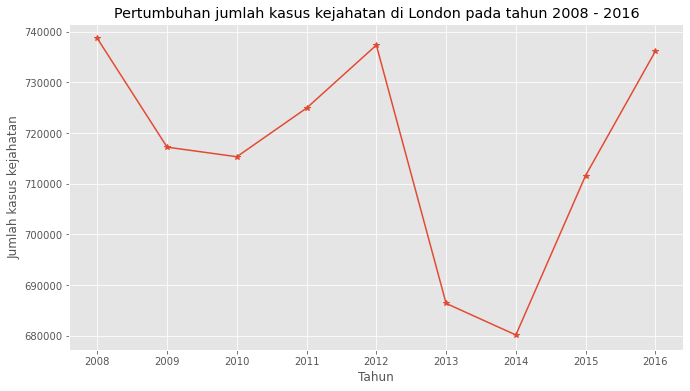

In [10]:
# membuat line plot
number_crime.plot(marker="*", figsize=(11,6));

plt.title("Pertumbuhan jumlah kasus kejahatan di London pada tahun 2008 - 2016")
plt.ylabel("Jumlah kasus kejahatan")
plt.xlabel("Tahun")

__Analisis pertanyaan 1__:
Berdasarkan grafik ini kita dapat mengetahui bahwa jumlah kasus tertinggi yang terjadi dalam rentang waktu 2008-2016 adalah di tahun 2008 dengan jumlah kasus sekitar 740.000 kasus. Dan jumlah kasus kejahatan terendah berada pada tahun 2014 dengan jumlah kasus sekitar 680.000 kasus. Namun setelah penurunan tersebut, jumlah kasus kembali naik pada 2015 dan 2016 hingga hampir kembali mencapai 740.000 kasus.

---

__Pertanyaan 2__ : Bagaimana persebaran jumlah kejahatan perbulan dari tahun 2008-2016?

In [11]:
# mengelompokkan berdasarkan bulan dan mejumlahkan kasus perbulan
month_crimes = df_lon.groupby('month')['value'].sum().reset_index()
month_crimes

,month,value
0,1,530247
1,2,500537
2,3,551795
3,4,520648
4,5,552704
5,6,549041
6,7,563076
7,8,532784
8,9,522377
9,10,558252


Scatter plot

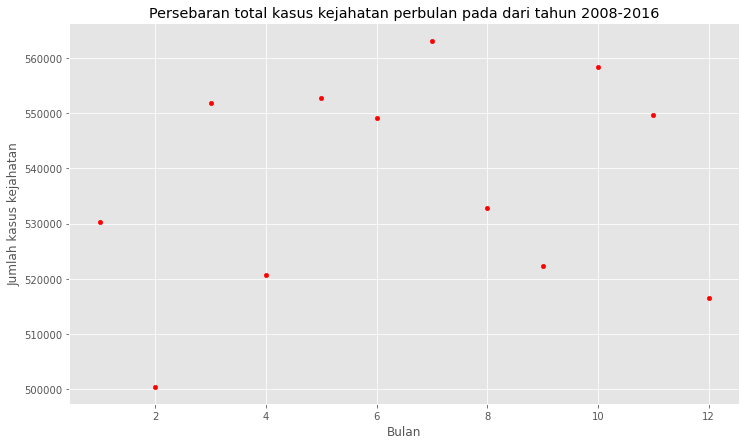

In [12]:
# membuat scatter plot
month_crimes.plot(kind='scatter', 
                x='month', 
                y='value', 
                figsize=(12,7),
                color='red')
plt.title("Persebaran total kasus kejahatan perbulan pada dari tahun 2008-2016")
plt.xlabel("Bulan");
plt.ylabel("Jumlah kasus kejahatan");

__Analisis pertanyaan 2__: Berdasarkan grafik ini kita dapat mengetahui bahwa persebaran jumlah kasus kejahatan perbulan tidak saling berkorelasi, di mana setiap bulan memiliki jumlah kasus kejahatan yang bervariasi, dengan kasus kejahatan tertinggi berada di bulan Juli yang di mana pada saat itu adalah musim panas dan terendah pada bulan Februari pada masa musim dingin.

---

__Pertanyaan 3__ : Kategori kejahatan mayor apa yang paling banyak terjadi pada tahun 2008-2016?

Pie chart

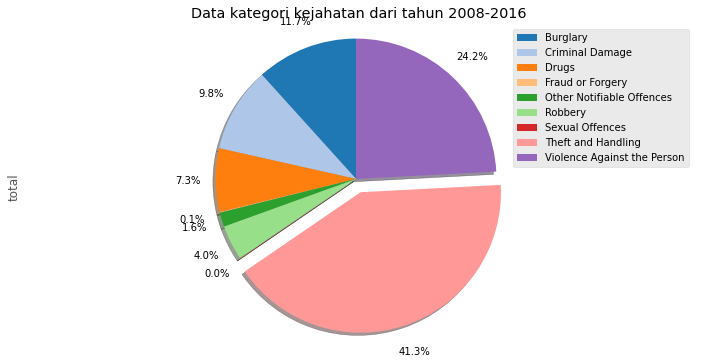

In [13]:
# membuat list explode untuk pie chart
explode_list = [0,0,0,0,0,0,0,0.1,0]
# palette warna yang akan digunakan
colors=sns.color_palette('tab20')[:9]
# membuat pie chart
df_majorcat['total'].plot(kind='pie',
                               figsize=(12,6),
                               autopct="%.1f%%",
                               startangle= 90,
                               shadow=True,
                               labels=None,
                               colors=colors,
                               pctdistance=1.2,
                               explode=explode_list);
plt.legend(labels=df_majorcat.index);
plt.title("Data kategori kejahatan dari tahun 2008-2016")
plt.axis('equal');

__Analisis pertanyaan 3__ : Theft and Handling adalah kategori kejahatan yang paling banyak terjadi dari tahun 2008-2016 dengan presentase tertinggi yaitu mencapai 41.3% dari 9 kategori kasus kejahatan yang ada. Selain itu, di tempat kedua terdapat Violence Against the Person dengan jumlah presentase sebesar 24.2%.

---

__Pertanyaan 4__ : Apakah terjadi kenaikan atau penurunan dalam jumlah kategori kasus Theft and Handling dari tahun 2014 sampai 2016?

Bar chart

Text(0.5, 0, 'Tahun')

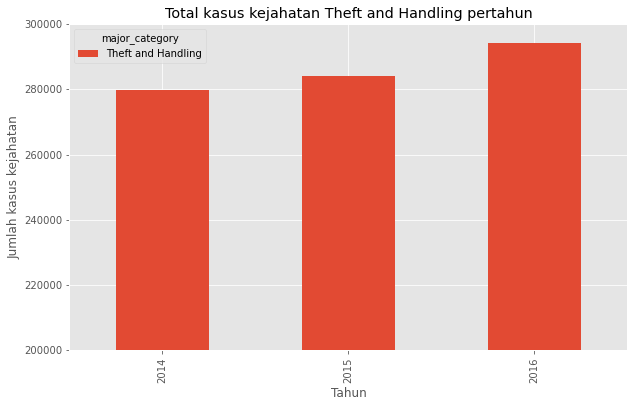

In [14]:
# mengambil data dengan kategori Theft and Handling dari tahun 2014-2016
threft_handling = df_majorcat.loc[["Theft and Handling"], [2014, 2015, 2016]]
# transpose data yang telah diambil dan membuat bar chart
threft_handling.transpose().plot(kind='bar', figsize=(10,6))

plt.ylim(200000, 300000)
plt.title("Total kasus kejahatan Theft and Handling pertahun")
plt.ylabel("Jumlah kasus kejahatan")
plt.xlabel("Tahun")

__Analisis pertanyaan 4__ : Dalam rentang 3 tahun terakhir dari data yaitu 2014-2016 total kasus kejahatan Theft and Handling mengalami kenaikan setiap tahunnya, dengan selisih pertambahan kasus sekitar 5.000 sampai 10.000 kasus pertahun. Di mana pada tahun 2014 jumlah kasus berada pada sekitar angka 280.000 kasus dan pada tahun 2015 terjadi sedikit kenaikan dengan total kasus sekitar 285.000 kasus kemudian pada tahun 2016 hampir mencapai 300.000 kasus.

---

__Pertanyaan 5__ : 5 wilayah London dengan jumlah kasus terbanyak dari tahun 2008 sampai 2016

In [15]:
# mengurutkan lima wilayah dengan total kasus tertinggi
top5_borough = df_boroughs.sort_values(by='total', ascending=False)[:5]
top5_borough


year,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


Area plot

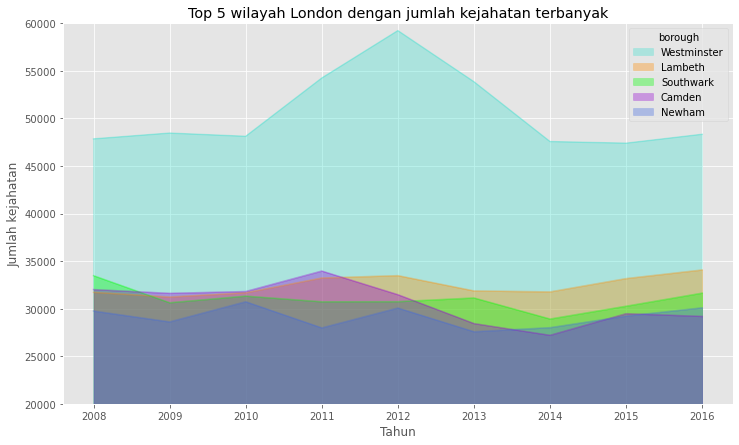

In [16]:
# mentranspose dan membuat plot
top5_borough.drop('total', axis=1).transpose().plot(kind='area',
                                                    alpha=0.35,
                                                    stacked=False,
                                                    figsize=(12,7), 
                                                    color=['turquoise', 'darkorange', 'lime', 'darkviolet', 'royalblue']);
plt.ylim(20000, 60000)                                                    
plt.title("Top 5 wilayah London dengan jumlah kejahatan terbanyak")
plt.ylabel("Jumlah kejahatan");
plt.xlabel("Tahun");

__Analisis pertanyaan 5__ : Dari area plot ini kita dapat mengetahui bahwa 5 wilayah dengan jumlah kasus kejahatan terbanyak dari tahun 2008-2016 adalah wilayah Westminster, Lambeth, Southwark, Camden, Newham. Westminster adalah wilayah yang paling banyak kasus dari Top 5 wilayah ini, di mana Westminster mencakup sebagian besar area dengan angka tertinggi pada tahun 2012 yaitu sekitar 60.000 kasus.

---

__Pertanyaan 6__ : Bagaimana persebaran dari jumlah kasus kejahatan dalam kategori Bulglary, Criminal Damage, Drugs dari tahun 2008-2016?

Histogram

Text(0.5, 1.0, 'Distribusi dalam kategori kejahatan Burglary, Criminal Damage, Drugs pada tahun 2008-2016')

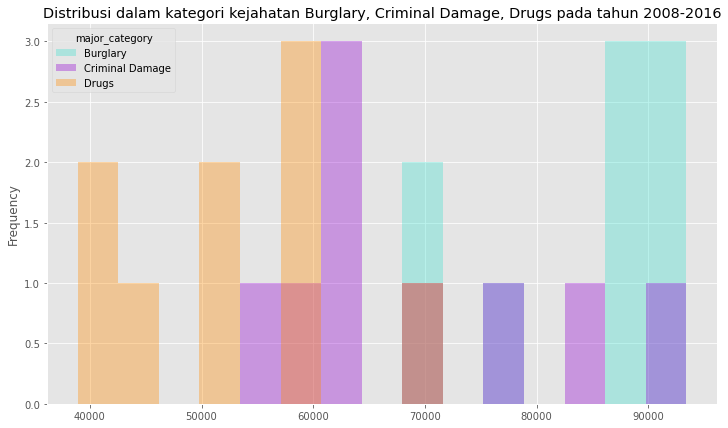

In [17]:
# mengambil data dengan kategori Burglary, Criminal Damage, dan Drugs
df_brd = df_majorcat.loc[["Burglary", "Criminal Damage", "Drugs"]]
# mengecualikan kolom total, metranspose, dan membuat plot
df_brd.drop('total', axis=1).transpose().plot(kind='hist', 
                                              alpha=0.35,
                                              bins=15,  
                                              figsize=(12,7),
                                              color=['turquoise', 'darkviolet', 'darkorange']);
plt.title("Distribusi dalam kategori kejahatan Burglary, Criminal Damage, Drugs pada tahun 2008-2016")


__Analisis pertanyaan 6__ : Dari histogram ini kita dapat mengetahui bahwa persebaran jumlah kasus kejahatan Drugs merupakan yang terendah dengan jumlah kasus sekitar 40.000 kasus. Dan untuk kejahatan Bruglary dan Criminal Damage ada yang berada di angka yang tinggi dengan jumlah kasus hingga melebihi 90.000 kasus. 

---

__Pertanyaan 7__ : Bandingkan distribusi jumlah kasus kejahatan di wilayah Croydon dan Ealing pada tahun 2008-2016

Box plot

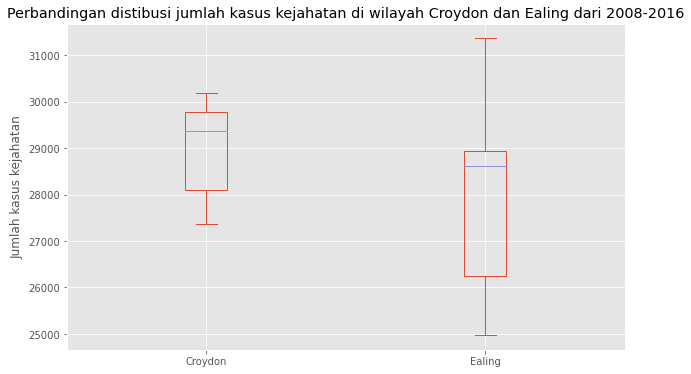

In [18]:
# mengambil data dengan wilayah Croydon dan Ealing
df_croydon = df_boroughs.loc[['Croydon', 'Ealing']]
# mengecualikan kolom total, mentranspose, dan membuat plot
df_croydon.drop('total', axis=1).transpose().plot(kind='box', figsize=(10,6))

plt.title("Perbandingan distibusi jumlah kasus kejahatan di wilayah Croydon dan Ealing dari 2008-2016");
plt.ylabel("Jumlah kasus kejahatan");

__Analisis pertanyaan 7__ : Dari plot ini kita dapat mengamati bahwa range jumlah kasus kejahatan pada wilayah Ealing lebih tersebar daripada wilayah Croydon. Jumlah kasus kejahatan tertinggi Croydon setiap tahun sekitar 30.000 kasus dan terendah sekitar 27.000 kasus, sedangkan untuk Ealing berada pada angka tertinggi lebih dari 31.000 kasus dan terendah sekitar 25.000 kasus.

---

__Pertanyaan 8__ : Word cloud terhadap kejahatan dalam kategori mayor

wordcloud

In [19]:
# menjumlahkan total kejahatan
total_crime = df_boroughs['total'].sum()
total_crime

6447758

In [20]:
# menentukan maksimal kata
max_words = 100
# membuat word string
word_string = ''

# membuat perulangan untuk setiap wilayah
for borough in df_boroughs.index.values:
    # memeriksa wilayah yang memiliki nama dengan satu kata
    if len(borough.split(' ')) == 1:
        repeat_num_times = int(df_boroughs.loc[borough,
        'total']/float(total_crime)*max_words)
        word_string = word_string + ((borough + ' ') * repeat_num_times)

# membuat word cloud
crime_wc = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


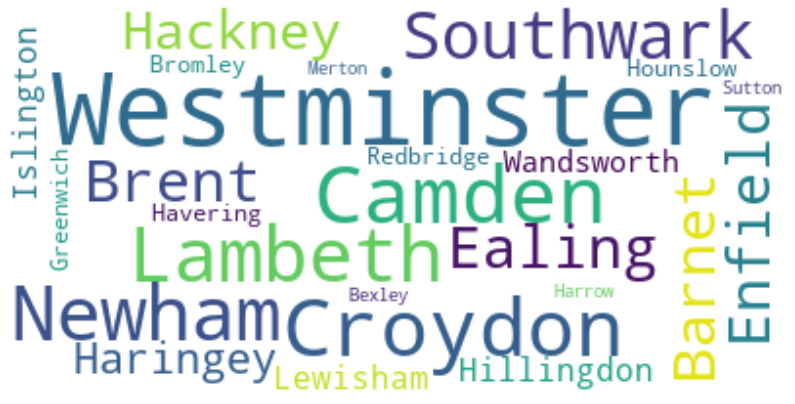

In [21]:
# tampilkan word cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(crime_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

__Analisis wordcloud__ : Dari 100 kata word cloud pada nama wilayah di London, wilayah dengan jumlah kasus terbanyak adalah Westminster.

---

## Kesimpulan

Dari analisis ini kita dapat menarik kesimpulan:
- Total kasus kejahatan tertinggi berada pada tahun 2008 dan terendah berada pada tahun 2014. Dan kembali mengalami kenaikan hingga tahun 2016
- Jumlah kasus kejahatan meningkat sekitar musim panas yaitu pada bulan Juli. Dan menurun pada musim dingin yaitu bulan Februari
- Kategori kejahatan yang paling banyak terjadi dari tahun 2008-2016 adalah Theft and Handling
- Kasus kejahatan Theft and Handling terus meningkat dari tahun 2014 sampai 2016
- Top 5 wilayah dengan jumlah kasus kejahatan terbanyak dari tahun 2008-2016 adalah Westminster, Lambeth, Southwark, Camden, Newham.
- Di antara tiga kategori kejahatan Drugs, Burglary, dan Criminal Damage, Drugs memiliki persebaran terendah dan Burglary serta Criminal Damage memiliki persebaran tertinggi
- Range jumlah kasus kejahatan pada wilayah Ealing lebih tersebar daripada wilayah Croydon
- Wilayah dengan jumlah kasus terbanyak adalah Westminster